Example of isnull

In [2]:
import pandas as pd
import numpy as np

In [3]:
string_data=pd.Series(['aardvark', 'artichoke',np.nan, 'avocado'])
string_data


0     aardvark
1    artichoke
2          NaN
3      avocado
dtype: object

In [4]:
string_data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

The built-in Python None value is also treated as NA in object arrays

In [5]:
string_data[0]=None
string_data.isnull()


0     True
1    False
2     True
3    False
dtype: bool

In [6]:
string_data

0         None
1    artichoke
2          NaN
3      avocado
dtype: object

Filtering out missing data
กรณีข้อมูลเป็น Series

In [7]:
from numpy import nan as NA
data=pd.Series([1,NA,3.5,NA,7])
data

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

In [8]:
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [9]:
data

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

In [10]:
data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

กรณีข้อมูลเป็น DataFrame
เราสามารถใช้ pandas.dropna() โดย default จะ drop ข้อมูลในแนว row ที่มี missing data

In [11]:
data=pd.DataFrame([[1.,6.5,3.],[1.,NA,NA],[NA,NA,NA],[NA,6.5,3.]])
cleaned=data.dropna()
data



,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [12]:
cleaned

,0,1,2
0,1.0,6.5,3.0


แต่ถ้าเพิ่ม how=‘all’ จะ drop ข้อมูลในแนว row ที่มีข้อมูลทุกตัวเป็น NA

In [13]:
data.dropna(how='all')



,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [14]:
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


แต่ถ้าจะ drop ข้อมูลในแนว column จะใช้ axis=1

In [15]:
data[4]=NA
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [16]:
data.dropna(axis=1,how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


thresh argument is applied to keep only rows containing a certain number of observations.

In [17]:
df=pd.DataFrame([[-0.204708,NA,NA],[-0.555730,NA,NA],[0.092908,NA,0.769023],[0.274992,0.228913,1.352917],[0.886429,-2.001637,-0.371843],[1.669025,-0.438570,-0.539741]])
df

,0,1,2
0,-0.204708,NaN,NaN
1,-0.555730,NaN,NaN
2,0.092908,NaN,0.769023
3,0.274992,0.228913,1.352917
4,0.886429,-2.001637,-0.371843
5,1.669025,-0.438570,-0.539741


In [18]:
df.dropna()

,0,1,2
3,0.274992,0.228913,1.352917
4,0.886429,-2.001637,-0.371843
5,1.669025,-0.438570,-0.539741


In [19]:
df.dropna(thresh=2) # เลือก dropเฉพาะแถวที่มี NA ตั้งแต่ 2 ค่า

,0,1,2
2,0.092908,NaN,0.769023
3,0.274992,0.228913,1.352917
4,0.886429,-2.001637,-0.371843
5,1.669025,-0.438570,-0.539741


In [20]:
df.dropna(thresh=3)

,0,1,2
3,0.274992,0.228913,1.352917
4,0.886429,-2.001637,-0.371843
5,1.669025,-0.438570,-0.539741


Filling in missing data
เป็นการเติมค่าที่หายไปให้มีค่าเป็นค่าที่เรากำหนด แทนการใส่ค่า NaN โดยใช้ method ที่เรียกว่า fillna()

In [21]:
df

,0,1,2
0,-0.204708,NaN,NaN
1,-0.555730,NaN,NaN
2,0.092908,NaN,0.769023
3,0.274992,0.228913,1.352917
4,0.886429,-2.001637,-0.371843
5,1.669025,-0.438570,-0.539741


In [22]:
df.fillna(0) #เติมค่า 0 แทนที่ NA

,0,1,2
0,-0.204708,0.000000,0.000000
1,-0.555730,0.000000,0.000000
2,0.092908,0.000000,0.769023
3,0.274992,0.228913,1.352917
4,0.886429,-2.001637,-0.371843
5,1.669025,-0.438570,-0.539741


In [23]:
df

,0,1,2
0,-0.204708,NaN,NaN
1,-0.555730,NaN,NaN
2,0.092908,NaN,0.769023
3,0.274992,0.228913,1.352917
4,0.886429,-2.001637,-0.371843
5,1.669025,-0.438570,-0.539741


In [24]:
df.fillna({1:0.5,2:0})

,0,1,2
0,-0.204708,0.500000,0.000000
1,-0.555730,0.500000,0.000000
2,0.092908,0.500000,0.769023
3,0.274992,0.228913,1.352917
4,0.886429,-2.001637,-0.371843
5,1.669025,-0.438570,-0.539741


In [25]:
df

,0,1,2
0,-0.204708,NaN,NaN
1,-0.555730,NaN,NaN
2,0.092908,NaN,0.769023
3,0.274992,0.228913,1.352917
4,0.886429,-2.001637,-0.371843
5,1.669025,-0.438570,-0.539741


In [26]:
#fillna returns a new object, but you can modify the existing object in-place:
df.fillna(0,inplace=True)
df

,0,1,2
0,-0.204708,0.000000,0.000000
1,-0.555730,0.000000,0.000000
2,0.092908,0.000000,0.769023
3,0.274992,0.228913,1.352917
4,0.886429,-2.001637,-0.371843
5,1.669025,-0.438570,-0.539741


นอกจากนั้นเราสามารถใช้ fillna ร่วมกับ method ffill เพื่อเติมค่า NA ให้เป็นค่าที่เท่ากับค่าที่อยู่ก่อนหน้า

In [27]:
#df=pd.DataFrame(np.random.randn(6,3))  สร้างข้อมูลสุ่ม 6 แถว 3 คอลัมน์
#df.iloc[2:,1]=NA   กำหนดให้แถว 2 เป็นต้นไป คอลัมน์ที่ 1 มีค่าเป็น NA
#df.iloc[4:,2]=NA   กำหนดให้แถว 4 เป็นต้นไป คอลัมน์ที่ 2 มีค่าเป็น NA

#สร้าง df ให้มีค่าตรงกับ slide
df=pd.DataFrame([[0.476985,3.248944,-1.021228],[-0.577087,0.124121,0.302614],[0.523772,NA,1.343810],[-0.713544,NA,-2.370232],[-1.860761,NA,NA],[-1.265934,NA,NA]])
df




,0,1,2
0,0.476985,3.248944,-1.021228
1,-0.577087,0.124121,0.302614
2,0.523772,NaN,1.343810
3,-0.713544,NaN,-2.370232
4,-1.860761,NaN,NaN
5,-1.265934,NaN,NaN


In [28]:
#ใช้ method ffill เพื่อเปลี่ยนค่า NaN
df.fillna(method='ffill')


/var/folders/7t/3b3ftw4173nfsbh_5d5nj6mh0000gn/T/ipykernel_5468/3482817588.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill')


,0,1,2
0,0.476985,3.248944,-1.021228
1,-0.577087,0.124121,0.302614
2,0.523772,0.124121,1.343810
3,-0.713544,0.124121,-2.370232
4,-1.860761,0.124121,-2.370232
5,-1.265934,0.124121,-2.370232


In [29]:
df

,0,1,2
0,0.476985,3.248944,-1.021228
1,-0.577087,0.124121,0.302614
2,0.523772,NaN,1.343810
3,-0.713544,NaN,-2.370232
4,-1.860761,NaN,NaN
5,-1.265934,NaN,NaN


In [30]:
df.fillna(method='ffill',limit=2)

/var/folders/7t/3b3ftw4173nfsbh_5d5nj6mh0000gn/T/ipykernel_5468/2005079682.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill',limit=2)


,0,1,2
0,0.476985,3.248944,-1.021228
1,-0.577087,0.124121,0.302614
2,0.523772,0.124121,1.343810
3,-0.713544,0.124121,-2.370232
4,-1.860761,NaN,-2.370232
5,-1.265934,NaN,-2.370232


In [31]:
#การกำหนดค่า NA ให้เป็นค่าเฉลี่ยของข้อมูล
data=pd.Series([1,NA,3.5,NA,7])
data.fillna(data.mean())


0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

In [32]:
df1=pd.DataFrame([[0.476985,3.248944,-1.021228],[-0.577087,0.124121,0.302614],[0.523772,NA,1.343810],[-0.713544,NA,-2.370232],[-1.860761,NA,NA],[-1.265934,NA,NA]]);df1


,0,1,2
0,0.476985,3.248944,-1.021228
1,-0.577087,0.124121,0.302614
2,0.523772,NaN,1.343810
3,-0.713544,NaN,-2.370232
4,-1.860761,NaN,NaN
5,-1.265934,NaN,NaN


In [33]:
df1.ffill(limit=3) # fill from the front row

,0,1,2
0,0.476985,3.248944,-1.021228
1,-0.577087,0.124121,0.302614
2,0.523772,0.124121,1.343810
3,-0.713544,0.124121,-2.370232
4,-1.860761,0.124121,-2.370232
5,-1.265934,NaN,-2.370232


In [34]:
df2=pd.DataFrame([[0.476985,3.248944,-1.021228],[-0.577087,0.124121,0.302614],[0.523772,NA,1.343810],[NA,-0.713544,-2.370232],[-1.860761,NA,NA],[-1.265934,NA,NA]]);df1

df2.bfill() # fill from the backward row

,0,1,2
0,0.476985,3.248944,-1.021228
1,-0.577087,0.124121,0.302614
2,0.523772,-0.713544,1.343810
3,-1.860761,-0.713544,-2.370232
4,-1.860761,NaN,NaN
5,-1.265934,NaN,NaN


Data Transformation

Removing Duplicates

Method duplicated ใช้ในการตรวจสอบว่ามีข้อมูลซ้ำกันหรือไม่ ซึ่งจะ return ค่าออกมาเป็น boolean Series

In [35]:
#สร้าง data ให้มีค่าตรงกับ slide
k1=pd.Series(["one","two","one","two","one","two","two"])
k2=pd.Series([1,1,2,3,3,4,4])

data=pd.DataFrame({'k1':k1,'k2':k2})
data


,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [36]:
data.duplicated() # Is data has more than one value?

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

Method drop_duplicates ใช้ในการลบข้อมูลที่ซ้ำออกไป

In [37]:
data.drop_duplicates()


,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [38]:
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


การ drop_duplicates เฉพาะข้อมูลซ้ำที่อยู่ใน column ที่กำหนด โดยจะลบข้อมูลตัวถัดไปและเก็บตัวแรกไว้

In [39]:
data.drop_duplicates('k1')

,k1,k2
0,one,1
1,two,1


In [40]:
data


,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


ใน drop_duplicates ถ้าต้องการให้เหลือตัวสุดท้ายไว้ จะใส่ attribute keep= 'last'

In [41]:
data.drop_duplicates(['k1', 'k2'],keep='last') #ลบข้อมูลซ้ำใน column k1 และ k2

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
6,two,4


Transforming Data Using a function or Mapping

In [42]:
food=pd.Series(["bacon","pulled pork","bacon","Pastrami","corned beef","Bacon","pastrami","honey ham","nova lox"])
ounces=pd.Series([4.0,3.0,12.0,6.0,7.5,8.0,3.0,5.0,6.0])

data=pd.DataFrame({'food':food,'ounces':ounces})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


จากข้อมูลที่กำหนดมา เราต้องการเพิ่มการอธิบายว่าอาหารนั้นมาจากสัตว์อะไร

In [43]:
meat_to_animal={'bacon':'pig','corned beef':'cow','honey ham':'pig','nova lox':'salmon','pastrami':'cow','pulled pork':'pig'}

meat_to_animal

{'bacon': 'pig',
 'corned beef': 'cow',
 'honey ham': 'pig',
 'nova lox': 'salmon',
 'pastrami': 'cow',
 'pulled pork': 'pig'}

จะใช้ method map อย่างไรก็ตามเนื่องจากชื่ออาหาร มีทั้งตัวพิมพ์เล็กและใหญ่ จึงต้องทำการปรับข้อมูลก่อน

In [44]:
food_lowercase=data['food'].str.lower()
food_lowercase


0          bacon
1    pulled pork
2          bacon
3       pastrami
4    corned beef
5          bacon
6       pastrami
7      honey ham
8       nova lox
Name: food, dtype: object

In [45]:
data['animal']=food_lowercase.map(meat_to_animal);data
# column's name = Data.map(dictionary) 
# มองว่า แต่ละ row จะเข้าไปใน dictionary ในฐานะ key
# แล้วนำค่า value ออกมา

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


ซึ่งสามารถเขียนในรูปแบบฟังก์ชันได้ดังนี้

In [46]:
data['food'].map(lambda x: meat_to_animal[x.lower()])

# เขียนในรูปที่รู้จักกันปกติว่า 
# map(lambda x: meat_to_animal[x.lower()], data["food"]) 
# แต่อย่างที่ทราบว่า รูปนี้ใช้ไม่ได้

# ใช้รูปแบบนี้
# column's name .map(lambda x: dictionary [x.function()]) 


0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

In [47]:
data['food'].str.lower().map(meat_to_animal) #หรือเขียนแบบนี้

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

โดยเมื่อนำคำสั่งมาเขียนรวมกันจะได้ดังนี้

In [48]:
data['animal']= data['food'].map(lambda x: meat_to_animal[x.lower()])
data


,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


Replacing Values

Method replace ใช้ในการแทนค่าข้อมูลด้วยค่าที่เรากำหนด

In [49]:
data=pd.Series([1.0,-999.0,2.0,-999.0,-1000.0,3.0])
data


0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [50]:
data.replace([-999,-1000],np.nan)



0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [51]:
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [52]:
data.replace(-999,np.nan)


0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

รวมทั้งใช้ในการแทนค่าข้อมูลด้วยค่าที่แตกต่างหรือ กำหนดด้วยรูปแบบของ dict

In [53]:
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [54]:
data.replace([-999,-1000],[np.nan,0])



0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [55]:
data.replace({-999:np.nan,-1000:0}) #ให้ผลลัพธ์เหมือนคำสั่งบน

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [56]:
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

Renaming Axis Indexes

In [57]:
one={'Ohio':0,'Colorado':4,'New York':8}
two={'Ohio':1,'Colorado':5,'New York':9}
three={'Ohio':2,'Colorado':6,'New York':10}
four={'Ohio':3,'Colorado':7,'New York':11}
data=pd.DataFrame({'one':one,'two':two,'three':three,'four':four})
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [58]:
temp_data=data.copy()

ปรับ index ของ data ให้เป็นตัวพิมพ์ใหญ่ โดยทำเพียง 4 ตัวอักษร

In [59]:
transform=lambda x: x[:4].upper() # slicing string in data frame
data.index.map(transform)



Index(['OHIO', 'COLO', 'NEW '], dtype='object')

จากนั้นทำการปรับเปลี่ยน index โดย modify the DataFrame in-place

In [60]:
data.index=data.index.map(transform)
data

,one,two,three,four
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


หรือใช้ method rename

In [61]:
data=temp_data
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [62]:
data.rename(index=str.lower,columns=str.upper)



,ONE,TWO,THREE,FOUR
ohio,0,1,2,3
colorado,4,5,6,7
new york,8,9,10,11


In [63]:
data.rename(index={'Ohio': 'INDIANA' },columns={'three': 'peekaboo' })


,one,two,peekaboo,four
INDIANA,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [64]:
data.rename(index={'Ohio': 'INDIANA ' },inplace=True)


In [65]:
data

,one,two,three,four
INDIANA,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


Discretization and Binning

Method cut ใช้ในการตัดค่าข้อมูลด้วยช่วงของค่าที่เรากำหนด

In [66]:
ages=[20,22,25,27,21,23,37,31,61,45,41,32]
bins=[18,25,35,60,100]  # 19-25, 26-35, 36-60, 61-100
cats=pd.cut(ages,bins)	# เหมือน r script
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

Method codes ใช้กำหนด label ให้แต่ละช่วงโดยเริ่มจาก 0 จนถึง Catagories ที่มี

In [67]:
cats.codes
# แบ่งกลุ่ม

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [68]:
cats.categories
# แสดงเกณฑ์ที่ใช้ในการแบ่ง

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]], dtype='interval[int64, right]')

In [69]:
pd.value_counts(cats)

/var/folders/7t/3b3ftw4173nfsbh_5d5nj6mh0000gn/T/ipykernel_5468/1485279302.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(cats)


(18, 25]     5
(25, 35]     3
(35, 60]     3
(60, 100]    1
Name: count, dtype: int64

ใช้กำหนด labels เป็นชื่อแทนการใช้ตัวเลข

In [70]:
group_names=['Youth', 'YoungAdult', 'MiddleAged', 'Senior']
pd.cut(ages,bins,labels=group_names)


['Youth', 'Youth', 'Youth', 'YoungAdult', 'Youth', ..., 'YoungAdult', 'Senior', 'MiddleAged', 'MiddleAged', 'YoungAdult']
Length: 12
Categories (4, object): ['Youth' < 'YoungAdult' < 'MiddleAged' < 'Senior']

ถ้าเป็นการแบ่งข้อมูลตัวเลข คำสั่ง cut จะทำการคำนวณจุดแบ่งจากค่า minimum และ maximum ในข้อมูลเอง เช่น

In [71]:
data=np.random.rand(20) #data เกิดจากการสุ่ม ดังนั้นผลที่ run ได้จะไม่ตรงกับ slide
pd.cut(data,4,precision=2)


[(0.51, 0.75], (0.51, 0.75], (0.026, 0.27], (0.75, 0.99], (0.51, 0.75], ..., (0.27, 0.51], (0.27, 0.51], (0.026, 0.27], (0.75, 0.99], (0.026, 0.27]]
Length: 20
Categories (4, interval[float64, right]): [(0.026, 0.27] < (0.27, 0.51] < (0.51, 0.75] < (0.75, 0.99]]

Method qcut เป็นการแบ่งข้อมูลแบบ quantiles

In [72]:
data=np.random.randn(1000) # Normally distributed
cats=pd.qcut(data,4) 	# Cut into quartiles 
											# แบ่งตาม Quatiles -> 4 pieces
                      # qcut = Quatile Cut
cats


[(-0.00815, 0.662], (-0.696, -0.00815], (-3.989, -0.696], (-3.989, -0.696], (-3.989, -0.696], ..., (-3.989, -0.696], (-3.989, -0.696], (-3.989, -0.696], (-3.989, -0.696], (-3.989, -0.696]]
Length: 1000
Categories (4, interval[float64, right]): [(-3.989, -0.696] < (-0.696, -0.00815] < (-0.00815, 0.662] < (0.662, 3.101]]

(array([  1.,   6.,  25., 101., 202., 269., 236., 114.,  39.,   7.]),
 array([-3.98805002, -3.27914645, -2.57024288, -1.8613393 , -1.15243573,
        -0.44353216,  0.26537142,  0.97427499,  1.68317857,  2.39208214,
         3.10098571]),
 <BarContainer object of 10 artists>)

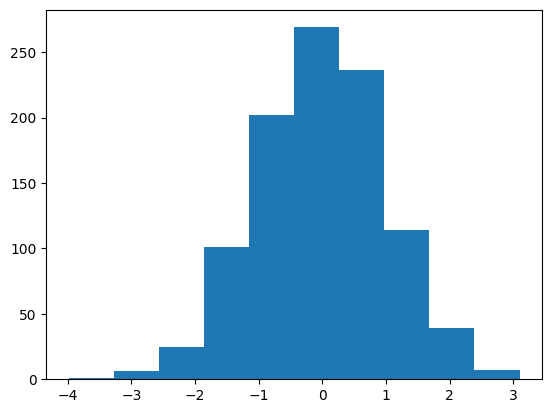

In [73]:
import matplotlib.pyplot as plt
plt.hist(data)

In [74]:
pd.value_counts(cats)

/var/folders/7t/3b3ftw4173nfsbh_5d5nj6mh0000gn/T/ipykernel_5468/1485279302.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(cats)


(-3.989, -0.696]      250
(-0.696, -0.00815]    250
(-0.00815, 0.662]     250
(0.662, 3.101]        250
Name: count, dtype: int64

Method qcut เป็นการแบ่งข้อมูลแบบ quantiles โดยกำหนดช่วงห่างจากผู้ใช้ซึ่งจะอยู่ในช่วงตัวเลข 0 ถึง 1

In [75]:
pd.qcut(data,[0,0.1,0.5,0.9,1.],labels=["10%","50%","90%","100%"])

['90%', '50%', '10%', '50%', '50%', ..., '50%', '50%', '50%', '50%', '50%']
Length: 1000
Categories (4, object): ['10%' < '50%' < '90%' < '100%']

Detecting and filtering outliers

เป็นการจัดการกับข้อมูลที่มีขอบเขตใหญ่เกินความต้องการของการดำเนินการ
   เช่น ข้อมูล DataFrame ที่มีการกระจายแบบปกติ

In [76]:
data=pd.DataFrame(np.random.randn(1000,4)) #data เกิดจากการสุ่ม ดังนั้นผลที่ run ได้จะไม่ตรงกับ slide
data.describe()


,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.012669,0.031558,-0.010206,-0.021483
std,1.009145,0.985752,1.015996,1.052579
min,-2.890049,-3.027121,-2.860239,-4.266103
25%,-0.649114,-0.626281,-0.692062,-0.691079
50%,0.017331,0.035240,-0.019583,-0.009705
75%,0.657434,0.648912,0.694268,0.680082
max,3.267071,3.107133,3.194705,4.954661


สมมติว่าเราต้องการหาค่าใน column 2 ที่มีค่า abs เกิน 3

In [77]:
col=data[2]
col[np.abs(col)>3]




294    3.000363
339    3.194705
Name: 2, dtype: float64

ถ้าต้องการแสดง rows ใดๆที่มีค่าอยู่นอกช่วง [-3, 3]

In [78]:
data[(np.abs(data) > 3).any(axis=1)]  #.any(1) checks if any value in a row is True

,0,1,2,3
58,0.542721,-1.062281,2.242160,-3.973241
119,3.267071,0.729349,0.029846,-1.936997
164,0.304711,0.043867,-0.704420,3.516669
291,0.203985,-1.395904,-0.599062,-3.768195
294,0.164707,0.005518,3.000363,1.416478
339,0.232181,0.406409,3.194705,0.264576
367,-0.646751,-3.027121,-0.037993,-1.269976
681,1.520241,1.542349,-1.337379,-4.266103
707,-1.097466,3.107133,0.121410,-0.102505
747,0.249342,0.598922,-0.366218,4.954661


คำสั่ง np.sign(data):
  เป็นการกำหนดค่า -1 หรือ 1 ให้กับข้อมูลที่มีอยู่
  การใช้เครื่องหมาย + หรือ -  จะขึ้นอยู่กับค่าเดิม

In [109]:
data1=pd.DataFrame(np.random.randn(100,4))
data1

,0,1,2,3
0,-0.303649,0.180469,-1.001111,0.900055
1,-0.888318,-0.759437,2.118684,0.878348
2,1.006326,-0.537444,0.821461,0.000223
3,-0.415498,-1.002354,0.275233,-0.713167
4,-0.343972,0.299727,-1.277954,0.608011
...,...,...,...,...
95,-0.478064,1.404166,-0.003482,-0.823842
96,-1.692240,-0.543081,-1.632440,-0.289965
97,0.494462,0.647847,-0.715871,1.530226
98,-0.193258,0.350976,1.683532,-0.965841


In [110]:
np.sign(data1).head()


,0,1,2,3
0,-1.0,1.0,-1.0,1.0
1,-1.0,-1.0,1.0,1.0
2,1.0,-1.0,1.0,1.0
3,-1.0,-1.0,1.0,-1.0
4,-1.0,1.0,-1.0,1.0


In [108]:
np.sign(data1)

,0,1,2,3
0,-1.0,-1.0,-1.0,-1.0
1,1.0,-1.0,-1.0,1.0
2,1.0,-1.0,-1.0,1.0
3,1.0,1.0,-1.0,1.0
4,-1.0,-1.0,-1.0,1.0
...,...,...,...,...
95,-1.0,1.0,-1.0,-1.0
96,-1.0,-1.0,1.0,-1.0
97,1.0,-1.0,-1.0,-1.0
98,-1.0,1.0,-1.0,-1.0


คำสั่ง np.sign(data)*k กำหนดค่า -1 หรือ 1 ให้กับข้อมูลแล้วคูณด้วยค่า k

In [104]:
data1=pd.DataFrame(np.random.randn(100,4))
data1


,0,1,2,3
0,-0.787369,0.534654,1.819755,1.291300
1,-0.361063,1.383764,0.783344,0.627051
2,-2.818732,0.349518,0.957885,0.711250
3,-0.771149,0.831680,-1.660719,-0.213033
4,1.132765,0.355897,-0.537530,0.606694
...,...,...,...,...
95,-1.046166,-0.165417,0.707791,-1.136175
96,0.483259,0.496281,1.228181,-0.274283
97,-0.520047,0.142289,0.012373,-0.594340
98,2.387807,-0.944272,-1.128941,2.231759


In [106]:
print(np.sign(data1)*3)

      0    1    2    3
0  -3.0  3.0  3.0  3.0
1  -3.0  3.0  3.0  3.0
2  -3.0  3.0  3.0  3.0
3  -3.0  3.0 -3.0 -3.0
4   3.0  3.0 -3.0  3.0
..  ...  ...  ...  ...
95 -3.0 -3.0  3.0 -3.0
96  3.0  3.0  3.0 -3.0
97 -3.0  3.0  3.0 -3.0
98  3.0 -3.0 -3.0  3.0
99  3.0 -3.0  3.0 -3.0

[100 rows x 4 columns]


In [83]:
data1[np.abs(data)>3]=np.sign(data1)*3
print(data1)

           0         1         2         3
0   0.493681  0.301013 -0.826075  0.086041
1  -0.377630 -0.328498  0.436273  0.663832
2  -0.058878 -1.227279  0.307141 -0.550531
3   0.521830 -2.674230 -0.955934 -0.583277
4   0.972608  0.349107 -0.911017 -0.999538
..       ...       ...       ...       ...
95 -0.651478  0.429284  1.672564  1.847452
96 -0.330602  0.782464  0.255743  0.008342
97  0.037614 -0.669180 -0.262002 -1.433330
98 -0.370771  1.251632  0.732680  0.371695
99 -0.449949 -0.336274 -0.895011 -0.993533

[100 rows x 4 columns]


Permutation and Random Sampling

In [84]:
df=pd.DataFrame(np.arange(5*4).reshape(5,4))
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [85]:
sampler=np.random.permutation(5) #random 0-4
sampler



array([2, 4, 1, 3, 0])

จากนั้นเราใช้ฟังก์ชัน take เพื่อจัดลำดับของ index ตาม permutation ใหม่

In [86]:
df.take(sampler)

,0,1,2,3
2,8,9,10,11
4,16,17,18,19
1,4,5,6,7
3,12,13,14,15
0,0,1,2,3


ถ้าต้องการสุ่มข้อมูลตัวอย่างมา n ชุด จะใช้คำสั่ง sample โดยมี 2 แบบคือ

สุ่มแบบซ้ำ (replace = True)

In [87]:
choice=pd.Series([5,7,-1,6,4])
draw=choice.sample(n=7,replace=True)
draw

1    7
0    5
4    4
4    4
3    6
4    4
3    6
dtype: int64

สุ่มแบบไม่ซ้ำ (replace = False) (Default)
(n ไม่เกินสมาชิกของ choice)

In [88]:
colhoice=pd.Series([5,7,-1,6,4])
draw=choice.sample(n=3)
draw

4    4
2   -1
0    5
dtype: int64


Computing Indicator/Dummy Variables



เป็นรูปแบบของการ transform ข้อมูลสำหรับเพื่อสร้างเป็นข้อมูล dummy หรือข้อมูลตัวแปรที่ใช้สำหรับการทดสอบหรือทดลองข้อมูล โดยใน pandas จะมีคำสั่ง get_dummies โดยข้อมูลที่ได้จะมีค่า 1 และ 0

In [89]:
df=pd.DataFrame({'key':['b','b','a','c','a','b'],'data1':range(6)})
df

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [90]:
pd.get_dummies(df['key'])
# index 1 -> key = b So b is True and other column is False
# index 3 -> key = a SO a is True and other column is False

,a,b,c
0,False,True,False
1,False,True,False
2,True,False,False
3,False,False,True
4,True,False,False
5,False,True,False


String Manipulation

In [91]:
val='a,b,  guido '
val.split(',')




['a', 'b', '  guido ']

In [92]:
pieces=[x.strip() for x in val.split(',')]
pieces

['a', 'b', 'guido']

Concatenated with a two-colon delimiter using addition

In [93]:
first,second,third=pieces
first+'::'+second+'::'+third # first = 'a'
														 # second = 'b'
														 # third = 'guido'


'a::b::guido'

In [94]:
"|||".join(pieces)

'a|||b|||guido'

Using Python to detect a substring : index and find

In [95]:
val

'a,b,  guido '

In [96]:
'guido' in val

True

In [97]:
val.index(',') #หาตำแหน่ง index ที่เจอ ,

1

In [98]:
val.find(',') #หาตำแหน่ง index ที่เจอ ,  ถ้าหาเจอจะมีค่าเท่ากับคำสั่งด้านบน

1

In [99]:
try: 
	val.index(':') #หาตำแหน่ง index ที่เจอ :  ถ้าหาไม่เจอจะเกิด ValueError
except:
	"KeyError"

In [100]:
val.find(":")

-1

In [101]:
val.find(':') #หาตำแหน่ง index ที่เจอ :  ถ้าหาไม่เจอจะเป็น -1

-1